In [7]:
import json
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as ticker


{'test_case': {'request': {'source': 363600, 'target': 453587},
  'weight': 797,
  'dijkstra_rank': 2},
 'timing_in_seconds': 3.0651e-05}

In [8]:
f_path = "../rank_tests_ch_timing_results.json"

with open(f_path) as f:
    d = json.load(f)

df = pd.DataFrame()
df["dijkstra rank"] = [x["test_case"]["dijkstra_rank"] for x in d]
df["time in seconds"] = [x["timing_in_seconds"] for x in d]

In [12]:
# Create dictionary based on log2(rank)
dict_by_log2_rank = {}

for _, row in df.iterrows():
    log2_rank = int(math.log2(row["dijkstra rank"]))
    rank_rounded = f"2e{log2_rank}"
    if rank_rounded not in dict_by_log2_rank:
        dict_by_log2_rank[rank_rounded] = []
    dict_by_log2_rank[rank_rounded].append(row["time in seconds"])

/tmp/ipykernel_96029/918650119.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


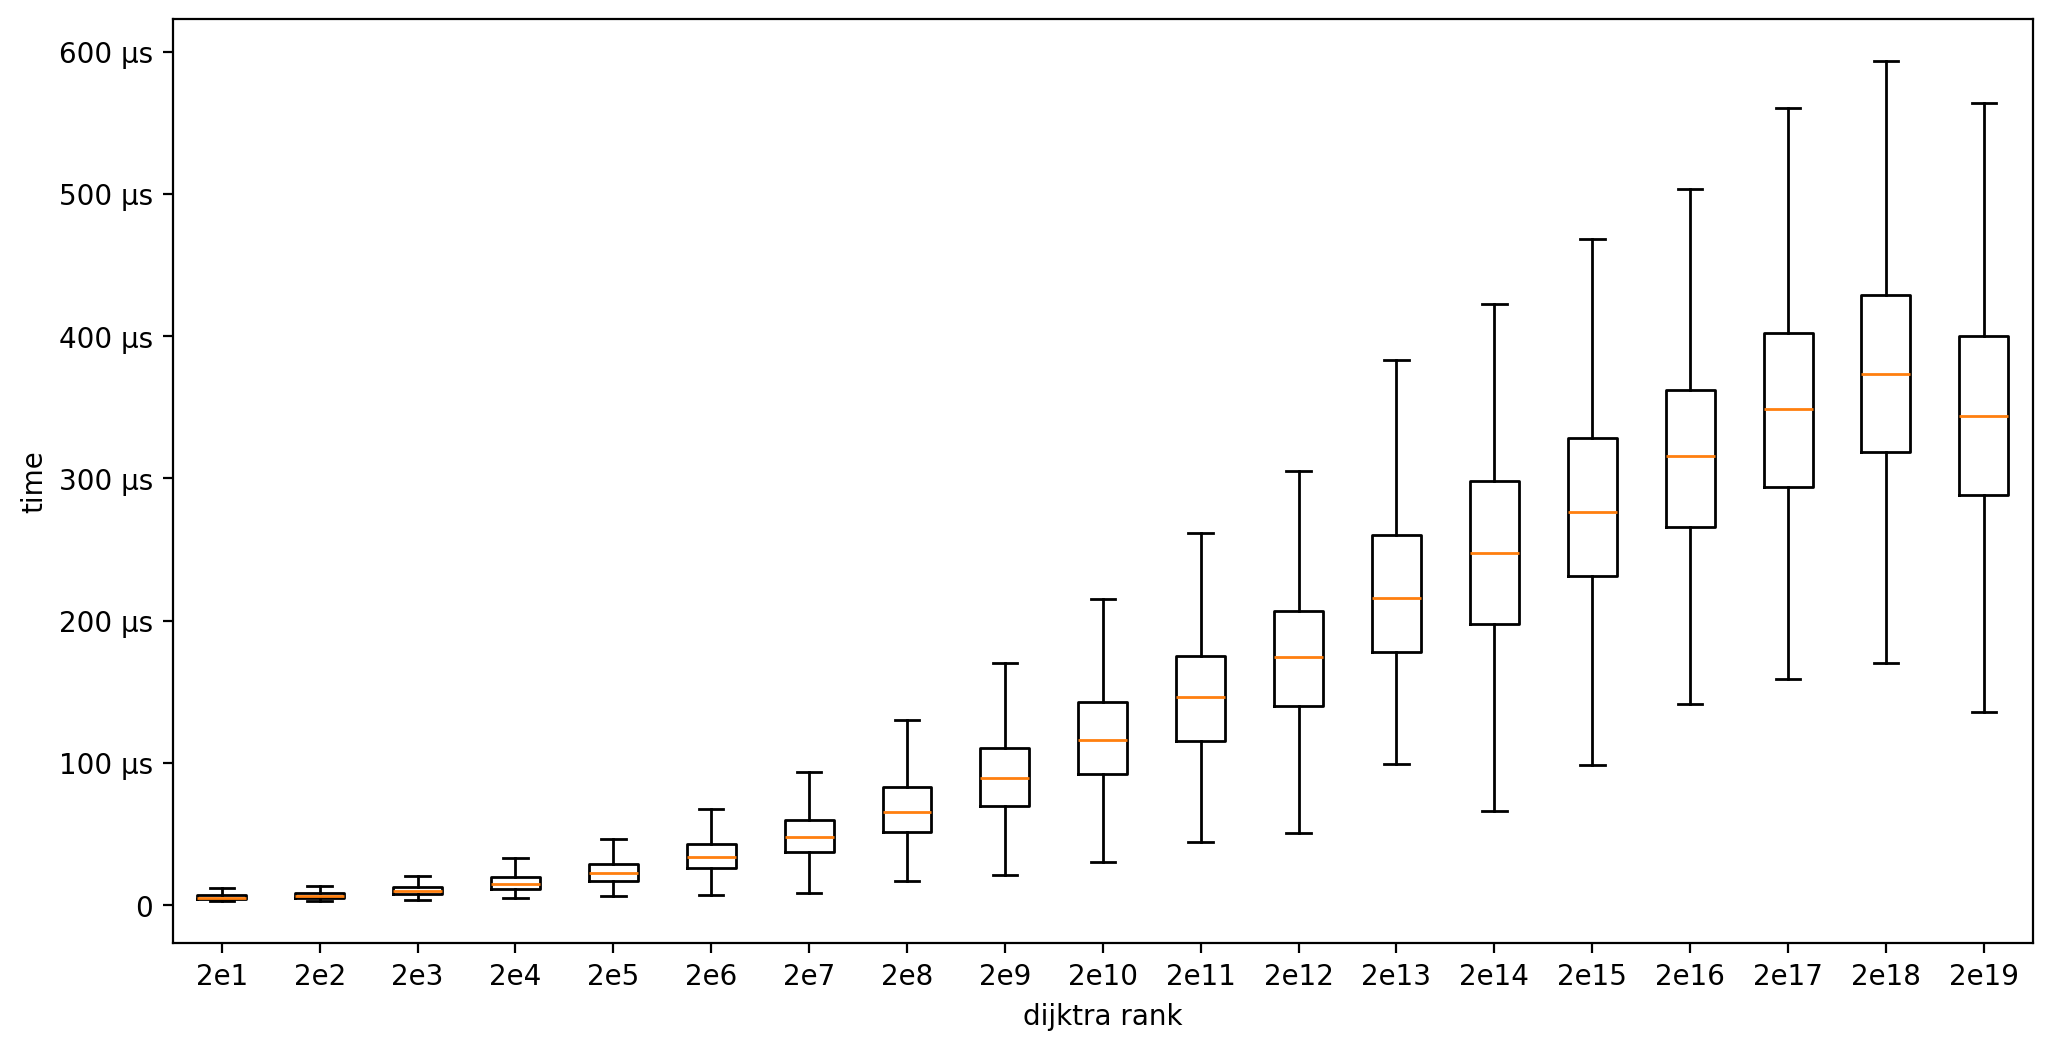

In [10]:
fig, ax = plt.subplots()
fig.set_dpi(200)

fig.set_size_inches(12.0, 6.0)

ax.boxplot(dict_by_log2_rank.values(), showfliers=False)
ax.set_xticklabels(dict_by_log2_rank.keys())

ax.set_xlabel("dijktra rank")
ax.set_ylabel("time in seconds")

# Function to format the y-axis ticks
def si_unit_formatter(x, pos):
    if x == 0:
        return "0"
    exponent = int(np.floor(np.log10(abs(x))))
    prefix = {3: 'k', 6: 'M', 9: 'G', 12: 'T', -3: 'm', -6: 'μ', -9: 'n', -12: 'p'}
    scaled_value = x / 10**(3 * (exponent // 3))
    return f'{scaled_value:g} {prefix.get(exponent // 3 * 3, "")}s'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(si_unit_formatter))


fig.show()

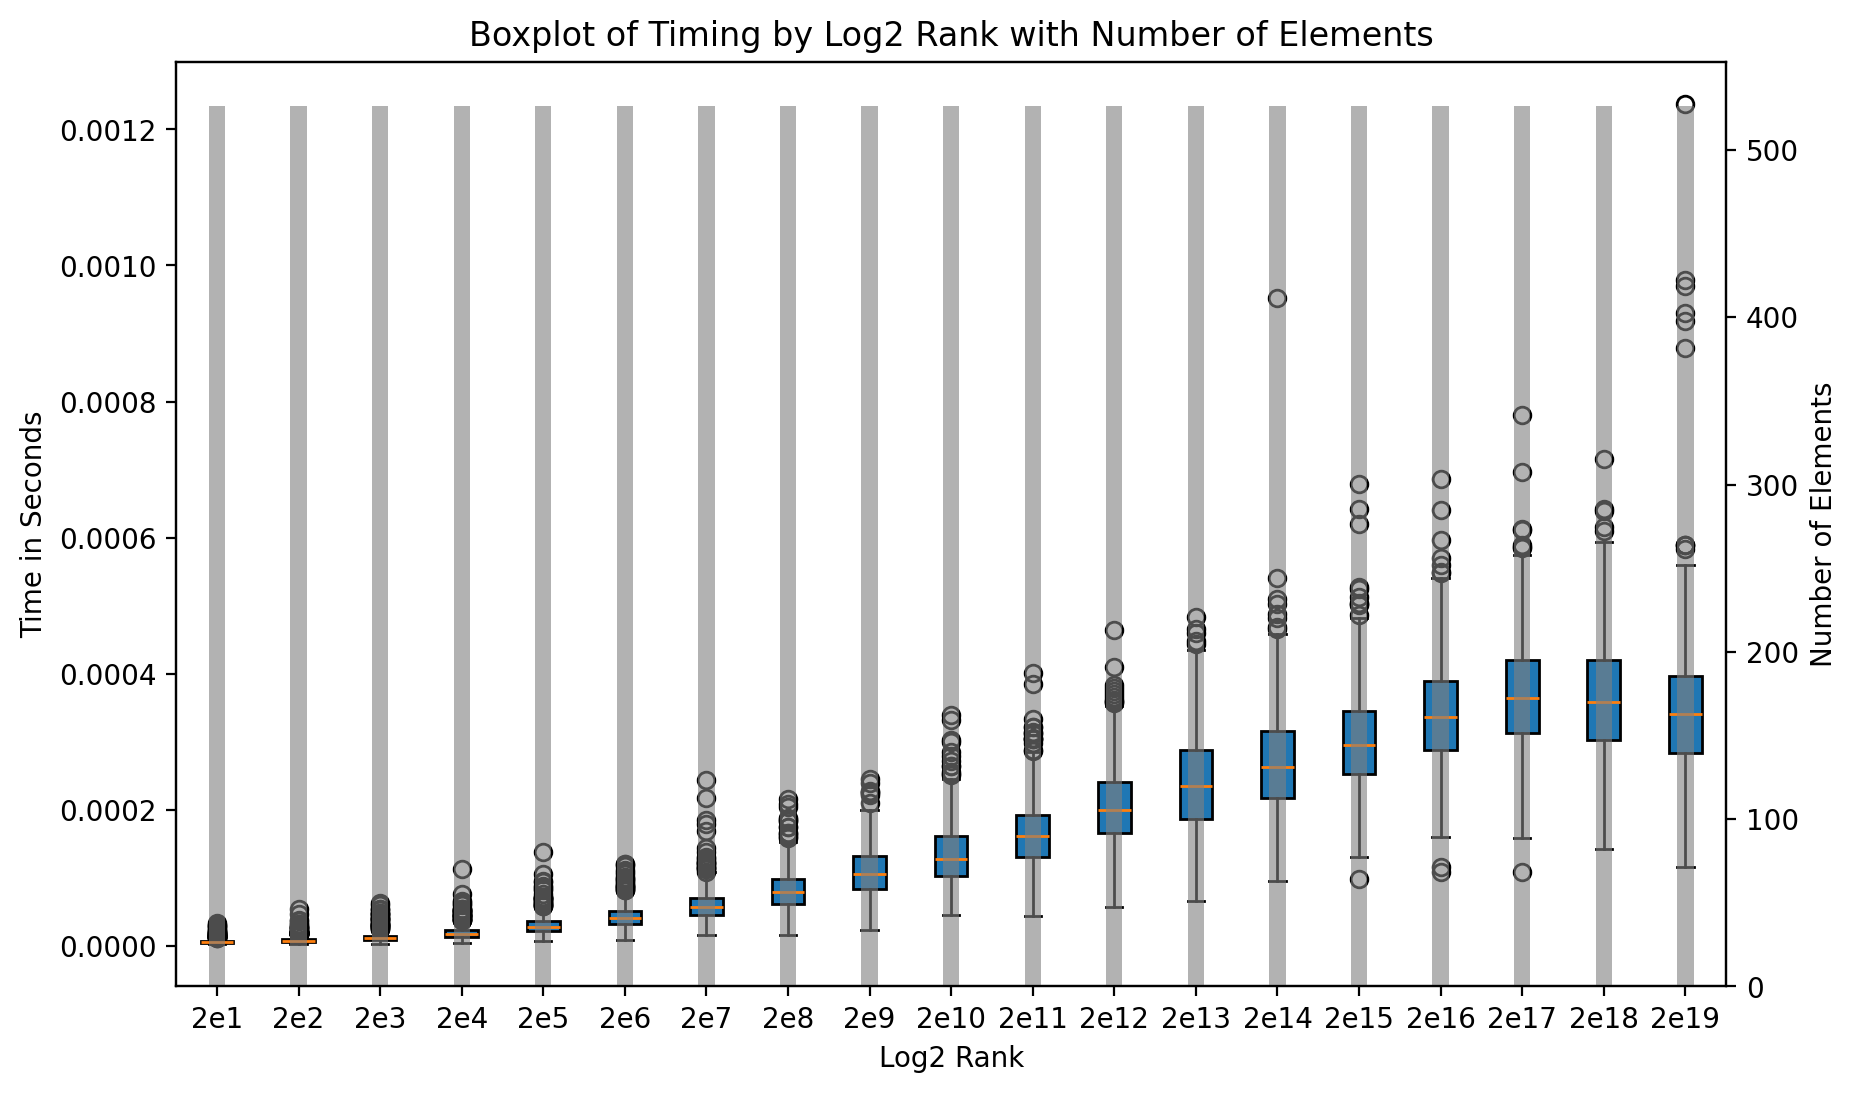

In [13]:
#   Could be nice for the future
#   # Prepare data for plotting
#   positions = list(range(1, len(dict_by_log2_rank) + 1))
#   boxplot_data = dict_by_log2_rank.values()
#   boxplot_labels = dict_by_log2_rank.keys()
#   num_elements = [len(values) for values in boxplot_data]
#   
#   # Plot boxplot for timings by log2(rank) and bar plot for number of elements
#   fig, ax1 = plt.subplots(figsize=(10, 6))
#   fig.set_dpi(200)
#   
#   # Plot boxplot
#   ax1.boxplot(boxplot_data, positions=positions, widths=0.4, patch_artist=True)
#   ax1.set_xticklabels(boxplot_labels)
#   ax1.set_xlabel('Log2 Rank')
#   ax1.set_ylabel('Time in Seconds')
#   ax1.set_title('Boxplot of Timing by Log2 Rank with Number of Elements')
#   
#   # Create a second y-axis for the bar plot
#   ax2 = ax1.twinx()
#   ax2.bar(positions, num_elements, width=0.2, color='gray', alpha=0.6, align='center')
#   ax2.set_ylabel('Number of Elements')
#   
#   plt.show()
